<a href="https://colab.research.google.com/github/parksangau/colab/blob/main/0203_python_EDA_%EB%B2%94%EC%A3%BC%ED%98%95_%EB%B3%80%EC%88%98_input_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 로드

In [1]:
# pandas, seaborn, numpy, matplotlib.pyplot 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 데이터셋 불러오기

In [2]:
# mpg 데이터셋을 불러옵니다.
# df
df = sns.load_dataset("mpg")
df.shape

(398, 9)

## 데이터셋 일부만 가져오기

In [3]:
# head
df.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


In [4]:
# tail
df.tail(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


## 요약하기

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


##  결측치 보기

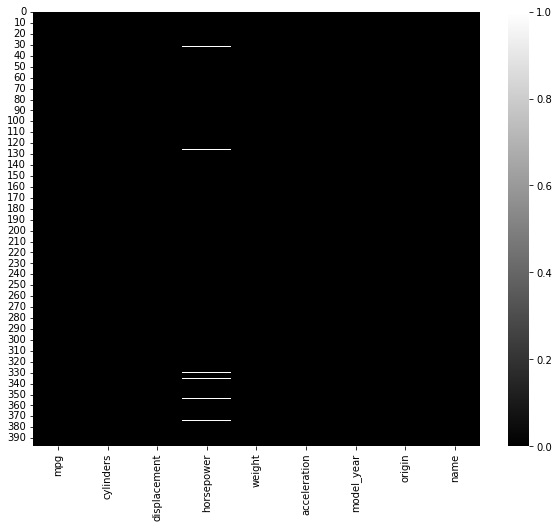

In [11]:
# isnull()
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap="gray")

## 기술통계

In [8]:
# describe 를 통해 범주형 변수에 대한 기술통계를 보기
df.describe(include="object")

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


## 범주형 변수
### 범주형 데이터 유일값의 빈도수

In [14]:
# nunique 값 구하기
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

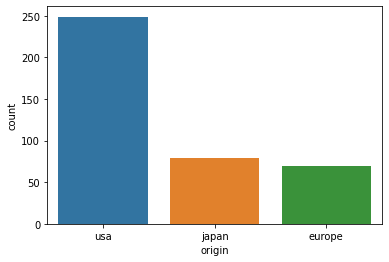

In [12]:
# countplot 으로 origin 빈도수 시각화 하기
sns.countplot(data=df, x="origin")

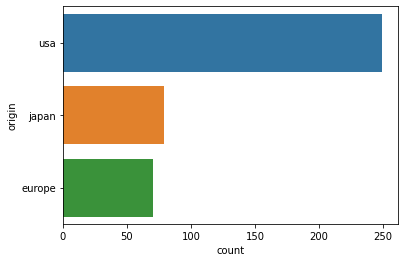

In [15]:
sns.countplot(data=df, y="origin")

### 1개 변수의 빈도수

In [16]:
# origin 의 빈도수 구하기
df["origin"].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

### 2개 이상의 변수에 대한 빈도수

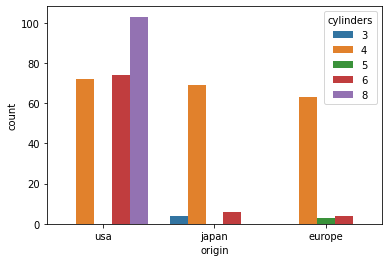

In [17]:
# hue 는 색상(컬러)를 의미함
# countplot 으로 origin 의 빈도수를 시각화 하고 cylinders 로 다른 색상으로 표현하기
sns.countplot(data=df, x="origin", hue="cylinders")

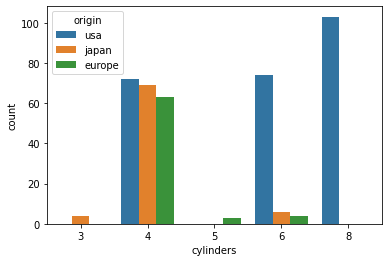

In [18]:
# countplot 으로 cylinders 의 빈도수를 시각화 하고 origin 으로 다른 색상으로 표현하기
sns.countplot(data=df, x="cylinders", hue="origin")

In [19]:
# pd.crosstab 으로 시각화한 값 직접 구하기
pd.crosstab(index=df["origin"], columns=df["cylinders"])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


In [20]:
pd.crosstab(df["origin"], df["cylinders"])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


### 범주형 vs 수치형 변수

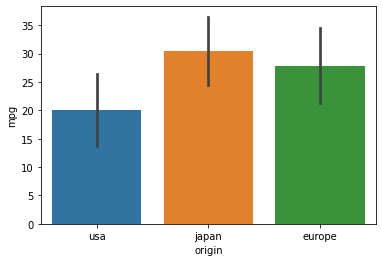

In [24]:
# barplot 으로 origin 별 origin 값 구하기
sns.barplot(data=df, x="origin", y="mpg", ci="sd")

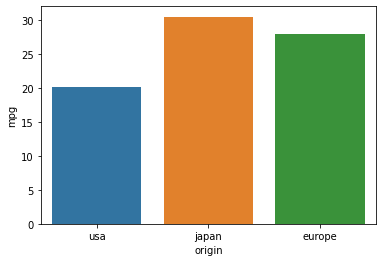

In [26]:
# ci 를 넣으면 시간이 오래 걸려서 보통 None 을 추천!
sns.barplot(data=df, x="origin", y="mpg", ci=None)

In [23]:
# 위 그래프에서 검은색 선은 무엇을 의미하는가?
sns.barplot?

### groupby 를 통한 연산

In [28]:
# groupby를 통해 origin 별로 그룹화 하고 mpg 의 평균 구하기
df.groupby("origin").mean()["mpg"]

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [30]:
# ["mpg"] 앞에 써도 위의 결과와 같음
df.groupby("origin")["mpg"].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

### pivot table을 통한 연산

In [33]:
# pivot_table 로 같은 값 구하기
df.pivot_table(index="origin", values="mpg")

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


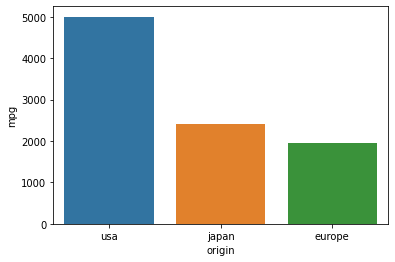

In [31]:
# barplot 으로 합계 값 구하기
sns.barplot(data=df, x="origin", y="mpg", estimator=np.sum, ci=None)

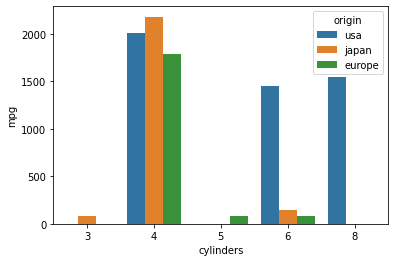

In [32]:
# barplot 에 hue 를 사용하여 색상을 다르게 표현해 보기
sns.barplot(data=df, x="cylinders", y="mpg", hue="origin", estimator=np.sum, ci=None)

In [38]:
# groupby 를 통해 위 시각화에 대한 값을 구하기

df.groupby(["cylinders", "origin"])["mpg"].sum()

cylinders  origin
3          japan       82.2
4          europe    1789.9
           japan     2180.1
           usa       2004.5
5          europe      82.1
6          europe      80.4
           japan      143.3
           usa       1455.1
8          usa       1541.2
Name: mpg, dtype: float64

In [39]:
# .unstack() : 없을때 (멀티 인덱스로 정렬) 있을때 (마지막 인덱스 값을 column 으로)
df.groupby(["cylinders", "origin"])["mpg"].sum().unstack()

origin,europe,japan,usa
cylinders,,,
3,NaN,82.2,NaN
4,1789.9,2180.1,2004.5
5,82.1,NaN,NaN
6,80.4,143.3,1455.1
8,NaN,NaN,1541.2


In [41]:
#  pivot_table 를 통해 위 시각화에 대한 값을 구하기
pd.pivot_table(data=df, index="cylinders", columns="origin", values="mpg", aggfunc=np.sum)

origin,europe,japan,usa
cylinders,,,
3,NaN,82.2,NaN
4,1789.9,2180.1,2004.5
5,82.1,NaN,NaN
6,80.4,143.3,1455.1
8,NaN,NaN,1541.2


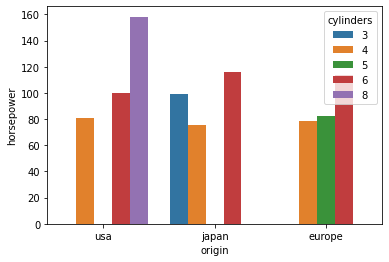

In [42]:
# cylinders 와 mpg 의 x, hue 값을 변경해서 시각화
sns.barplot(data=df, x="origin", y="horsepower", hue="cylinders", ci=None)

### boxplot과 사분위수

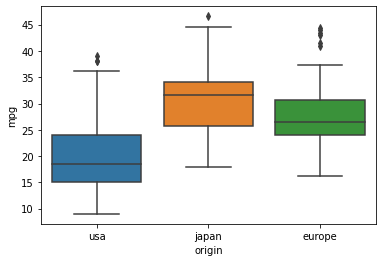

In [43]:
# boxplot 으로 origin 별 mpg 의 기술통계 값 구하기
sns.boxplot(data=df, x="origin", y="mpg")

In [55]:
# groupby로 origin 값에 따른 mpg의 기술통계 구하기
# 결과를 변수에 할당하여 재사용하기

desc = df.groupby("origin")["mpg"].describe()
eu = desc.loc["europe"]
eu

count    70.000000
mean     27.891429
std       6.723930
min      16.200000
25%      24.000000
50%      26.500000
75%      30.650000
max      44.300000
Name: europe, dtype: float64

### 박스플롯 이해하기
* https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

In [56]:
# IQR, 이상치를 제외한 최댓값, 최솟값 구하기
Q3 = eu["75%"]
Q1 = eu["25%"]
IQR = Q3 - Q1
OUT_MAX = Q3 + (1.5 * IQR)
OUT_MIN = Q1 - (1.5 * IQR)
Q3, Q1, IQR, OUT_MAX, OUT_MIN

(30.65, 24.0, 6.649999999999999, 40.625, 14.025000000000002)

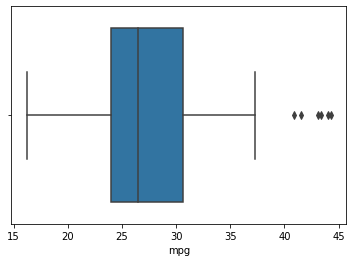

In [60]:
# europe 에 해당되는 값에 대해 boxplot 그리기
df_europe = df[df["origin"] == "europe"]
sns.boxplot(data=df_europe, x="mpg")

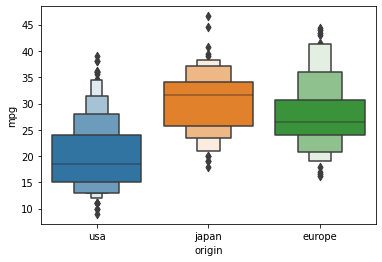

In [63]:
# boxenplot 그리기
sns.boxenplot(data=df, x="origin", y="mpg")

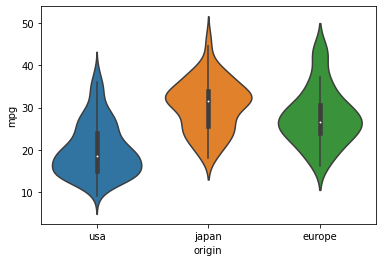

In [61]:
# violinplot 그리기
sns.violinplot(data=df, x="origin", y="mpg")

### 산점도를 통한 범주형 데이터 표현

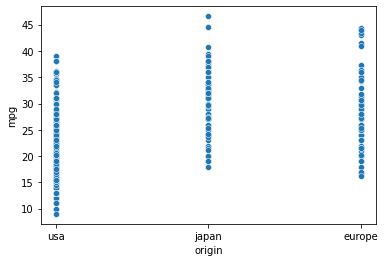

In [65]:
# scatterplot 으로 범주형 변수 그리기
sns.scatterplot(data=df, x="origin", y="mpg")

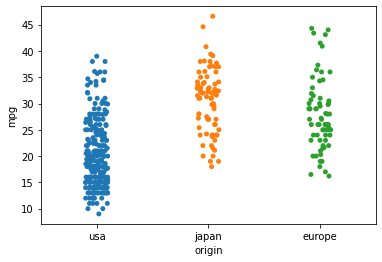

In [64]:
# stripplot
sns.stripplot(data=df, x="origin", y="mpg")

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


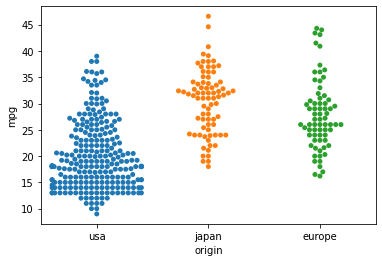

In [66]:
# swarmplot
sns.swarmplot(data=df, x="origin", y="mpg")

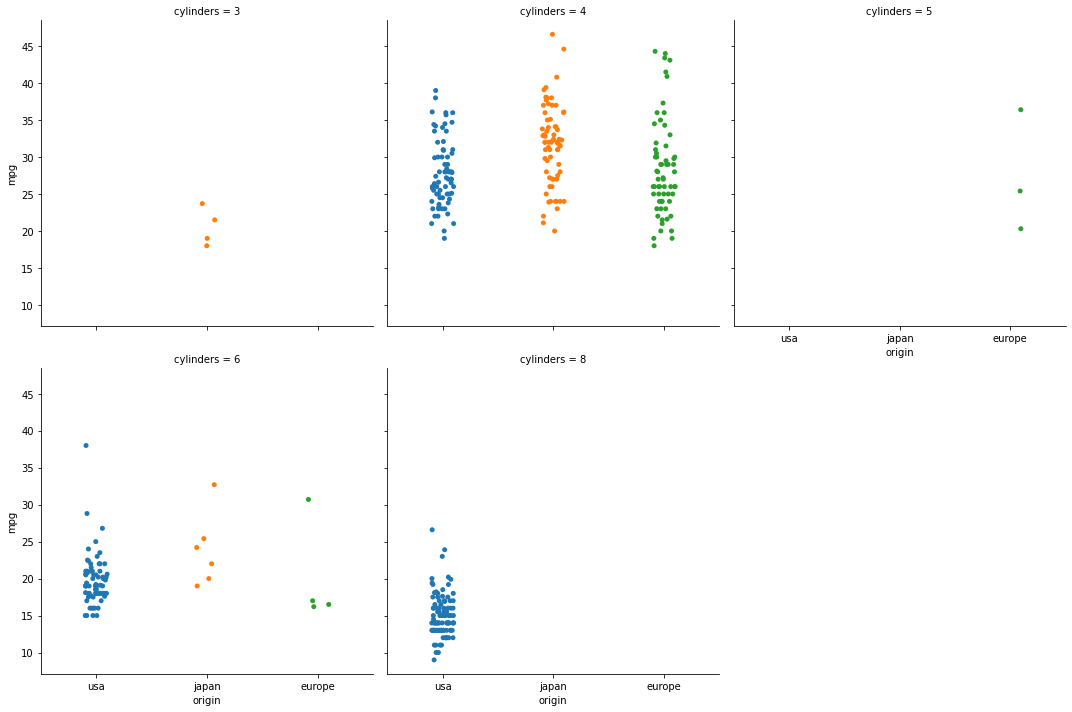

In [71]:
# catplot
sns.catplot(data=df, x="origin", y="mpg", col="cylinders", col_wrap=3)

### catplot을 통한 범주형 데이터의 서브플롯 시각화

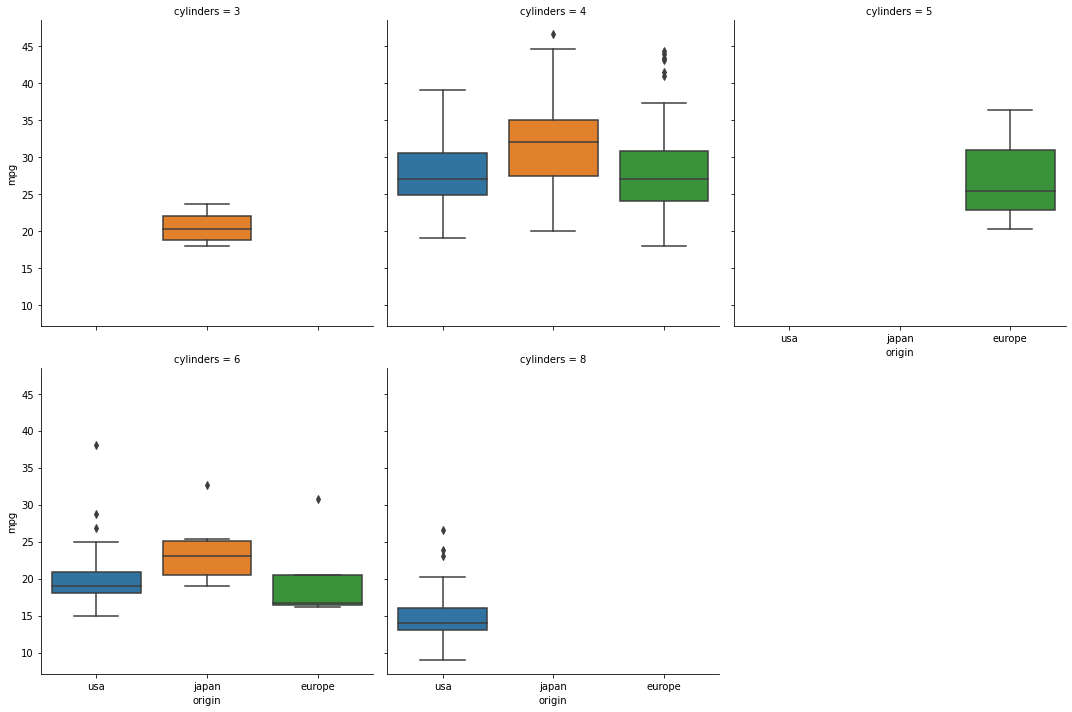

In [73]:
# catplot 으로 boxplot그리기
sns.catplot(data=df, x="origin", y="mpg", col="cylinders", col_wrap=3, kind="box")

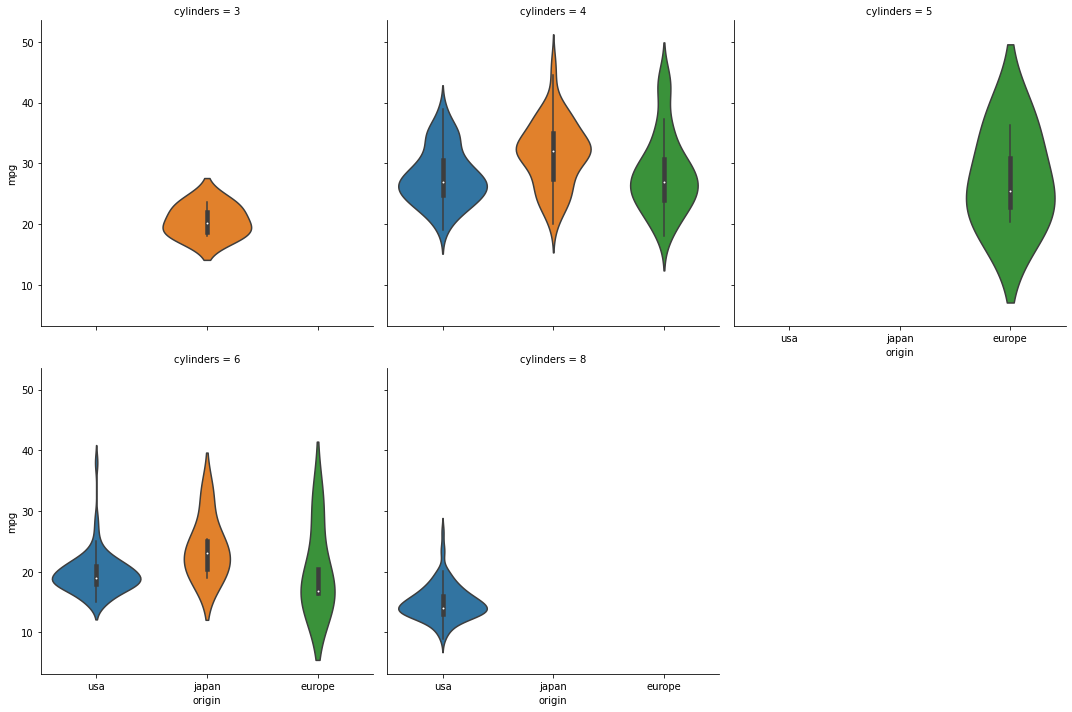

In [72]:
# catplot 으로 violinplot그리기
sns.catplot(data=df, x="origin", y="mpg", col="cylinders", col_wrap=3, kind="violin")

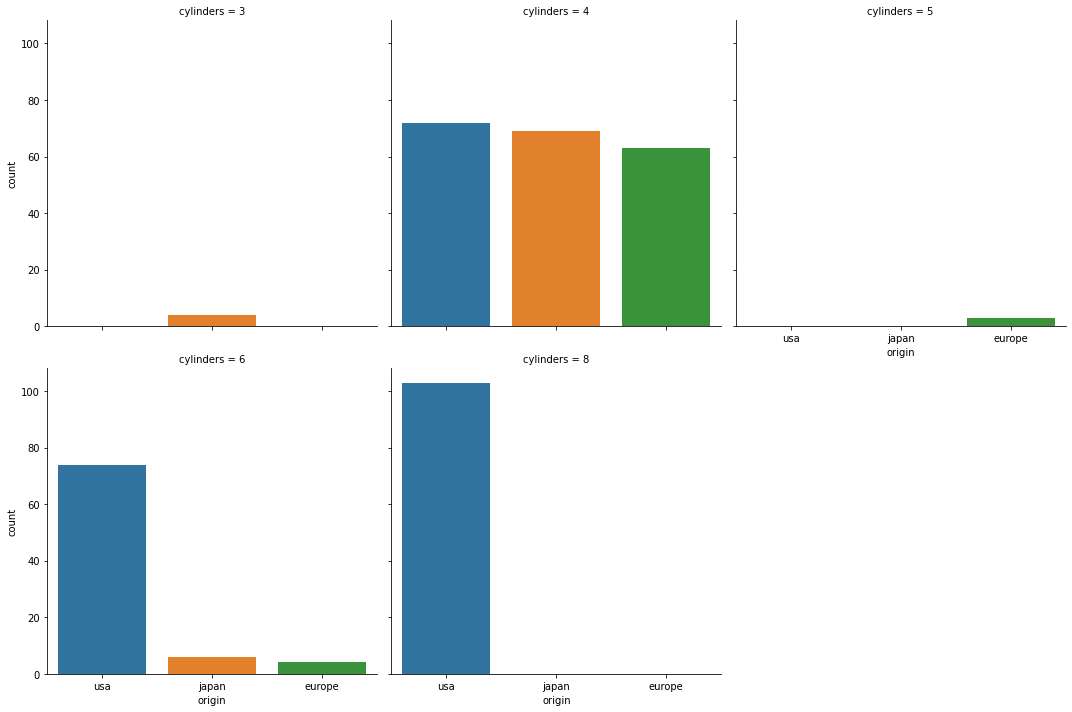

In [74]:
# catplot 으로 countplot그리기
# countplot 주의점 : y 축을 빼주어야함
sns.catplot(data=df, x="origin", col="cylinders", col_wrap=3, kind="count")